 ## 1. Import Required Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

## 2. Data Collection and Understanding

In [26]:
# Load the dataset
Customer_Churn = pd.read_csv(r"D:\Bank_Churn_Project\data\Customer-Churn-Records.csv")

In [27]:
# Check first 5 rows
print(Customer_Churn.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58

In [28]:
# Check dataset info
print(Customer_Churn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [29]:
# Check missing values
print(Customer_Churn.isnull().sum())

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64


Observations:
- No missing values in any columns.
- **12** numeric columns, **4** object (categorical) columns: **'Surname', 'Geography', 'Gender', 'Card Type'.**
- Target variable is **'Exited'.**

In [30]:
# Check shape and columns
print(Customer_Churn.shape)
print(Customer_Churn.columns)

(10000, 18)
Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')


In [31]:
# Drop unnecessary columns
Customer_Churn = Customer_Churn.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

Observations:
- Shape confirms **10000** rows and **18** columns.
- Columns like 'RowNumber', 'CustomerId', 'Surname' are not useful for prediction.

In [32]:
# Statistical summary
Customer_Churn.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


Observations:
- CreditScore: 350–850, mean ~650
- Age: 18–92, mean ~39
- Tenure: 0–10 years, mean ~5
- Balance: 0–250,898
- NumOfProducts: mostly 1, max 4
- HasCrCard: ~70% have credit card
- IsActiveMember: ~51% active
- EstimatedSalary: 11–199,992
- Exited: ~20% churn rate
- Satisfaction Score: 1–5
- Points Earned: 119–1000
- Dataset is clean and ready for preprocessing

## Visualization

### Target variable distribution

Exited
0    7962
1    2038
Name: count, dtype: int64


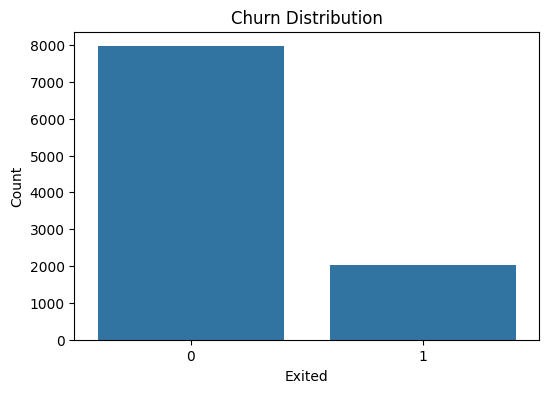

In [33]:
print(Customer_Churn['Exited'].value_counts())
plt.figure(figsize=(6,4))
sns.countplot(x='Exited', data=Customer_Churn)
plt.title('Churn Distribution')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.savefig('../plots/churn_distribution.png')
plt.show()

**Observation:**
 Target variable `Exited` shows ~20% of customers churned, 80% stayed.

### Categorical Features vs Target


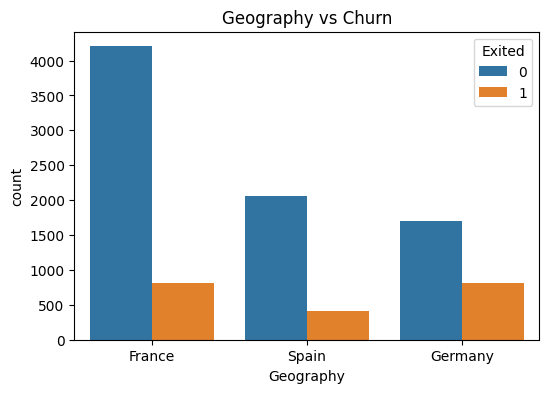

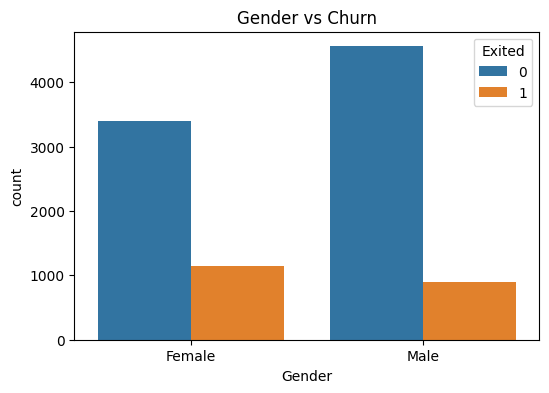

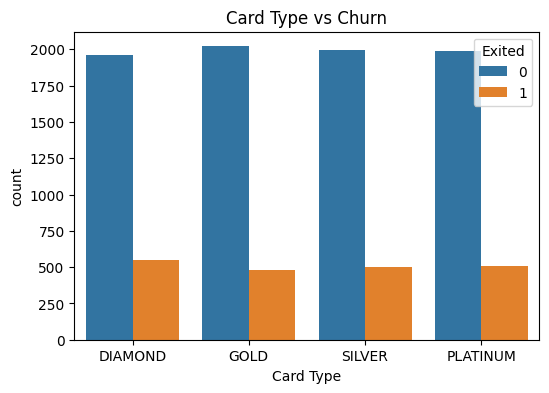

In [34]:
categorical_features = ['Geography', 'Gender', 'Card Type']

for col in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Exited', data=Customer_Churn)
    plt.title(f'{col} vs Churn')
    plt.savefig(f'../plots/{col.lower().replace(" ","_")}_vs_churn.png')
    plt.show()

### Insights – Categorical Features vs Churn

- **Germany** shows higher churn → consider regional retention strategies.
- **Female** customers churn slightly more → explore gender-based engagement.
- **Card Type** has minimal churn impact → not a strong predictor.

### Numerical Features vs Target

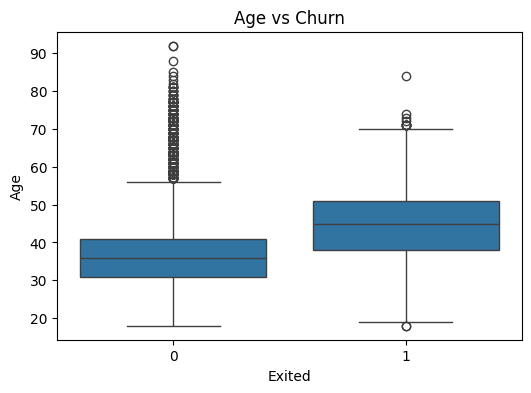

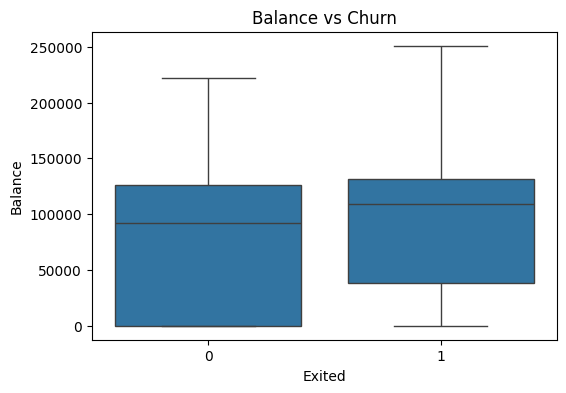

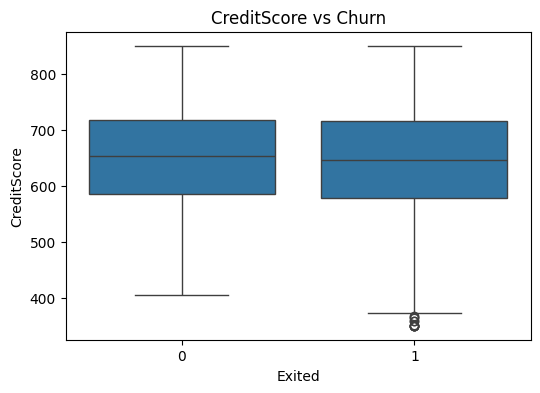

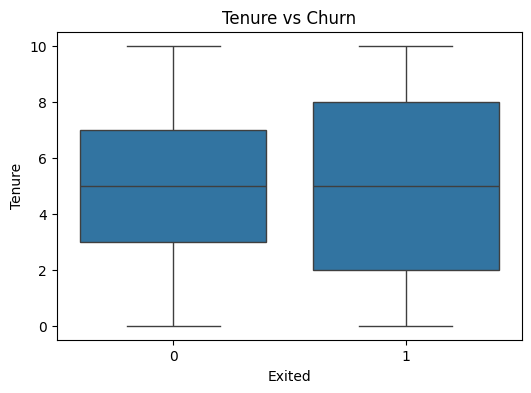

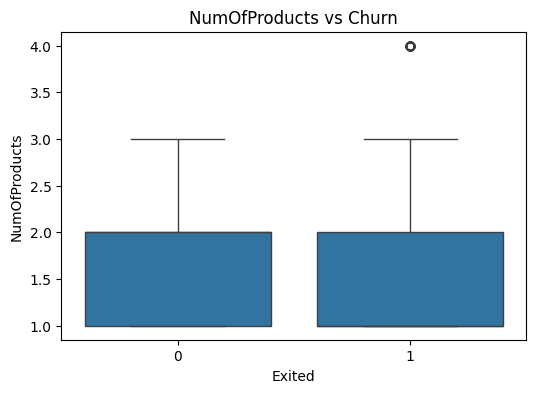

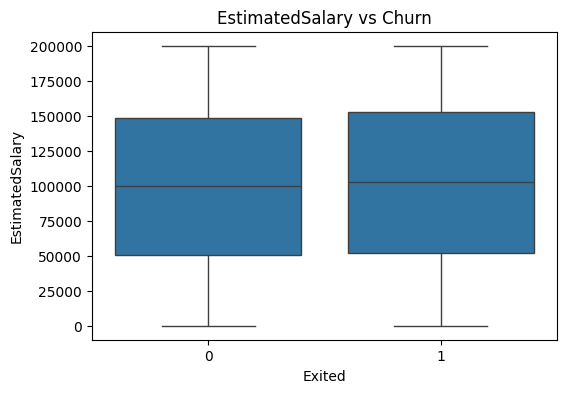

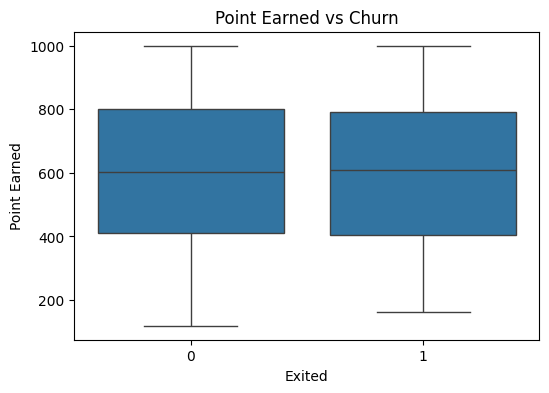

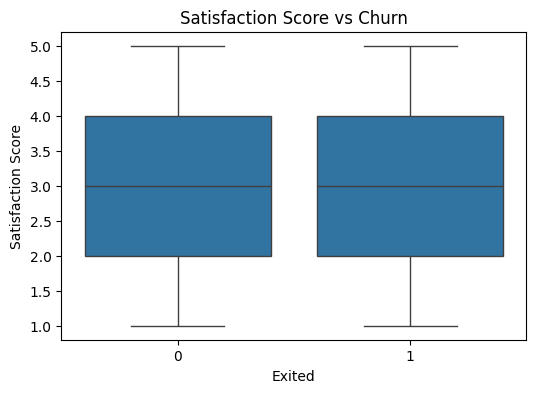

In [36]:
numerical_features = ['Age', 'Balance', 'CreditScore', 'Tenure', 
                      'NumOfProducts', 'EstimatedSalary', 'Point Earned', 'Satisfaction Score']

for col in numerical_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Exited', y=col, data=Customer_Churn)
    plt.title(f'{col} vs Churn')
    plt.savefig(f'../plots/{col.lower().replace(" ","_")}_vs_churn_boxplot.png')
    plt.show()

### Insights: Numerical Features vs Churn

- **Age vs Churn**  
  Customers who churn (Exited = 1) tend to be older.  
  Median age of churners is ~45+, while non-churners are younger (~35).  
  Older customers may be more likely to leave, possibly due to shifting financial needs or expectations.  

- **Balance vs Churn**  
  Churners show slightly higher median balances.  
  Non-churners include many with zero balance who still stay.  
  High-balance customers may expect premium service and exit if dissatisfied.  

- **Credit Score vs Churn**  
  Credit scores overlap heavily across both groups (600–700 range).  
  No strong separation—suggests limited predictive power in isolation.  
  May still add value when combined with other behavioral features.  

- **Tenure vs Churn**  
  Median tenure is similar (~6 years) for both churners and non-churners.  
  Tenure alone doesn’t explain churn—needs interaction with satisfaction or complaints.  

- **NumOfProducts vs Churn**  
  Most customers hold 1–2 products regardless of churn status.  
  Outliers with 4 products appear among churners—may indicate product fatigue or mismatch.  

- **Estimated Salary vs Churn**  
  Salary distributions are nearly identical across both groups.  
  Estimated salary does not show strong correlation with churn.  

- **Point Earned vs Churn**  
  Both groups have similar point distributions (median ~600).  
  Loyalty points alone don’t differentiate churn behavior.  

- **Satisfaction Score vs Churn**  
  Churners tend to have slightly lower satisfaction scores.  
  Supports the idea that dissatisfaction is a soft churn signal and should be prioritized in retention strategies.


### Numerical Feature Distributions (Histograms)

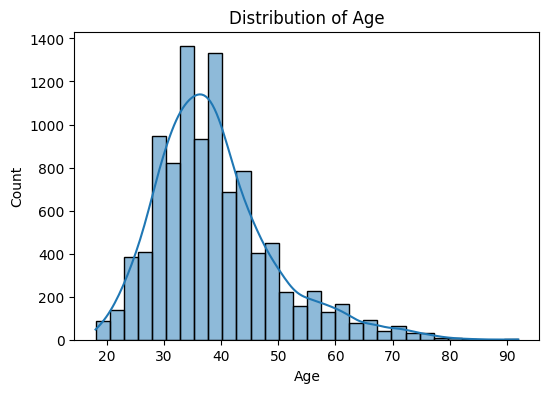

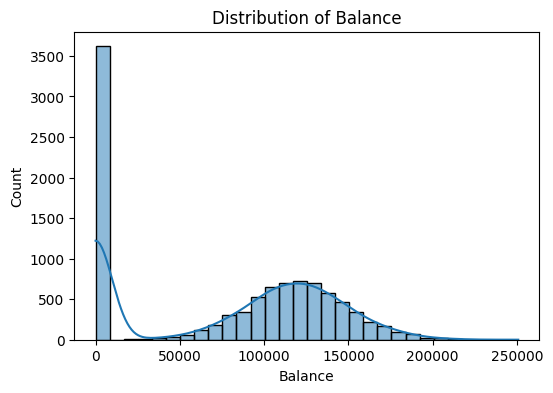

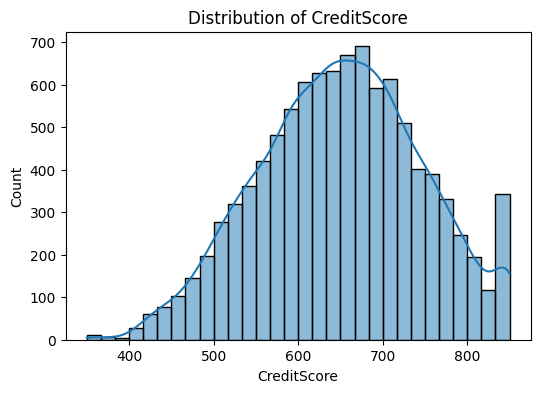

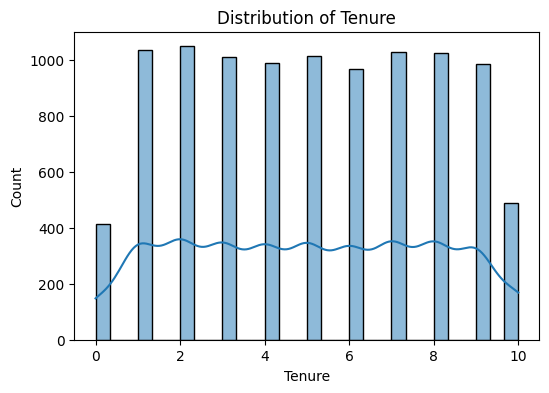

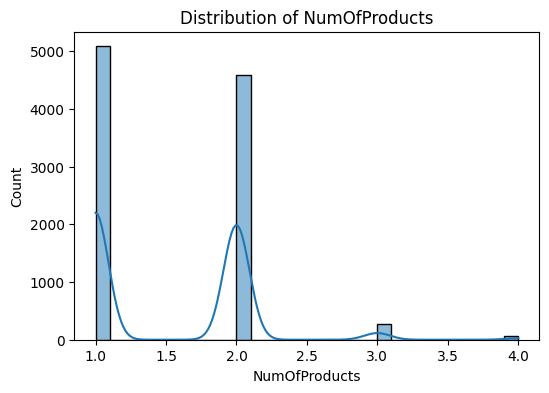

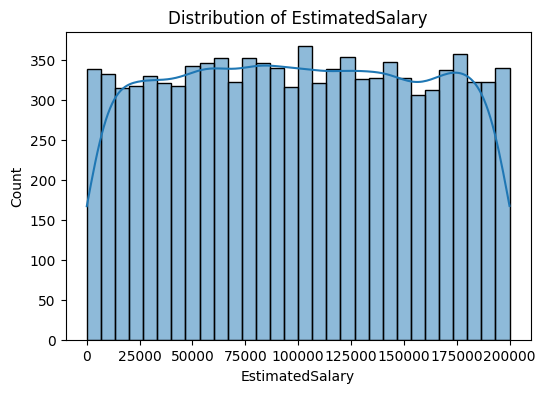

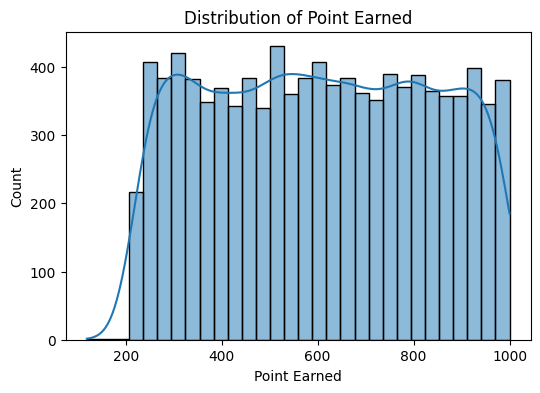

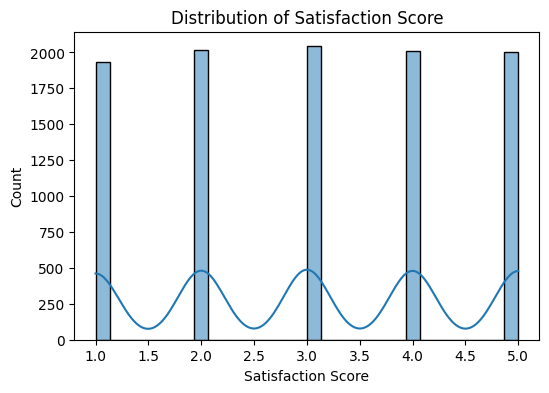

In [37]:
numerical_features = ['Age', 'Balance', 'CreditScore', 'Tenure', 
                      'NumOfProducts', 'EstimatedSalary', 'Point Earned', 'Satisfaction Score']

for col in numerical_features:
    plt.figure(figsize=(6,4))
    sns.histplot(Customer_Churn[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.savefig(f'../plots/hist_{col.lower().replace(" ","_")}.png')
    plt.show()

## Insights: Distribution of Numerical Features

### 🔹 Age
- Right-skewed distribution; most customers are aged between 30–40.  
- Very few older customers → younger customer base overall.  

### 🔹 Balance
- Bimodal distribution: large spike at **zero balance** and another around **120K**.  
- Many customers maintain zero balance → possibly inactive accounts or savings behavior.  

### 🔹 Credit Score
- Unimodal, slightly left-skewed, peaking near **700**.  
- Majority have moderate to high credit scores → financially stable base.  

### 🔹 Tenure
- Fairly uniform distribution between **1–9 years**, with dips at **0 and 10**.  
- Most customers are mid-tenure, fewer are brand-new or long-term clients.  

### 🔹 Number of Products
- Strong peaks at **1 and 2 products**; very few hold 3 or 4.  
- Indicates limited product adoption → cross-selling opportunities exist.  

### 🔹 Estimated Salary
- Uniform-like distribution across the range.  
- No strong clustering → diverse income levels among customers.  

### 🔹 Points Earned
- Fairly uniform from **300–1000**, with a spike around **200–300**.  
- Indicates varying engagement/tenure across customers.  

### 🔹 Satisfaction Score
- Evenly distributed across **1–5**, each with similar counts.  
- No dominant satisfaction level → mixed customer experiences.  


## Feature Relationships

### Pairplot (numeric features + target)

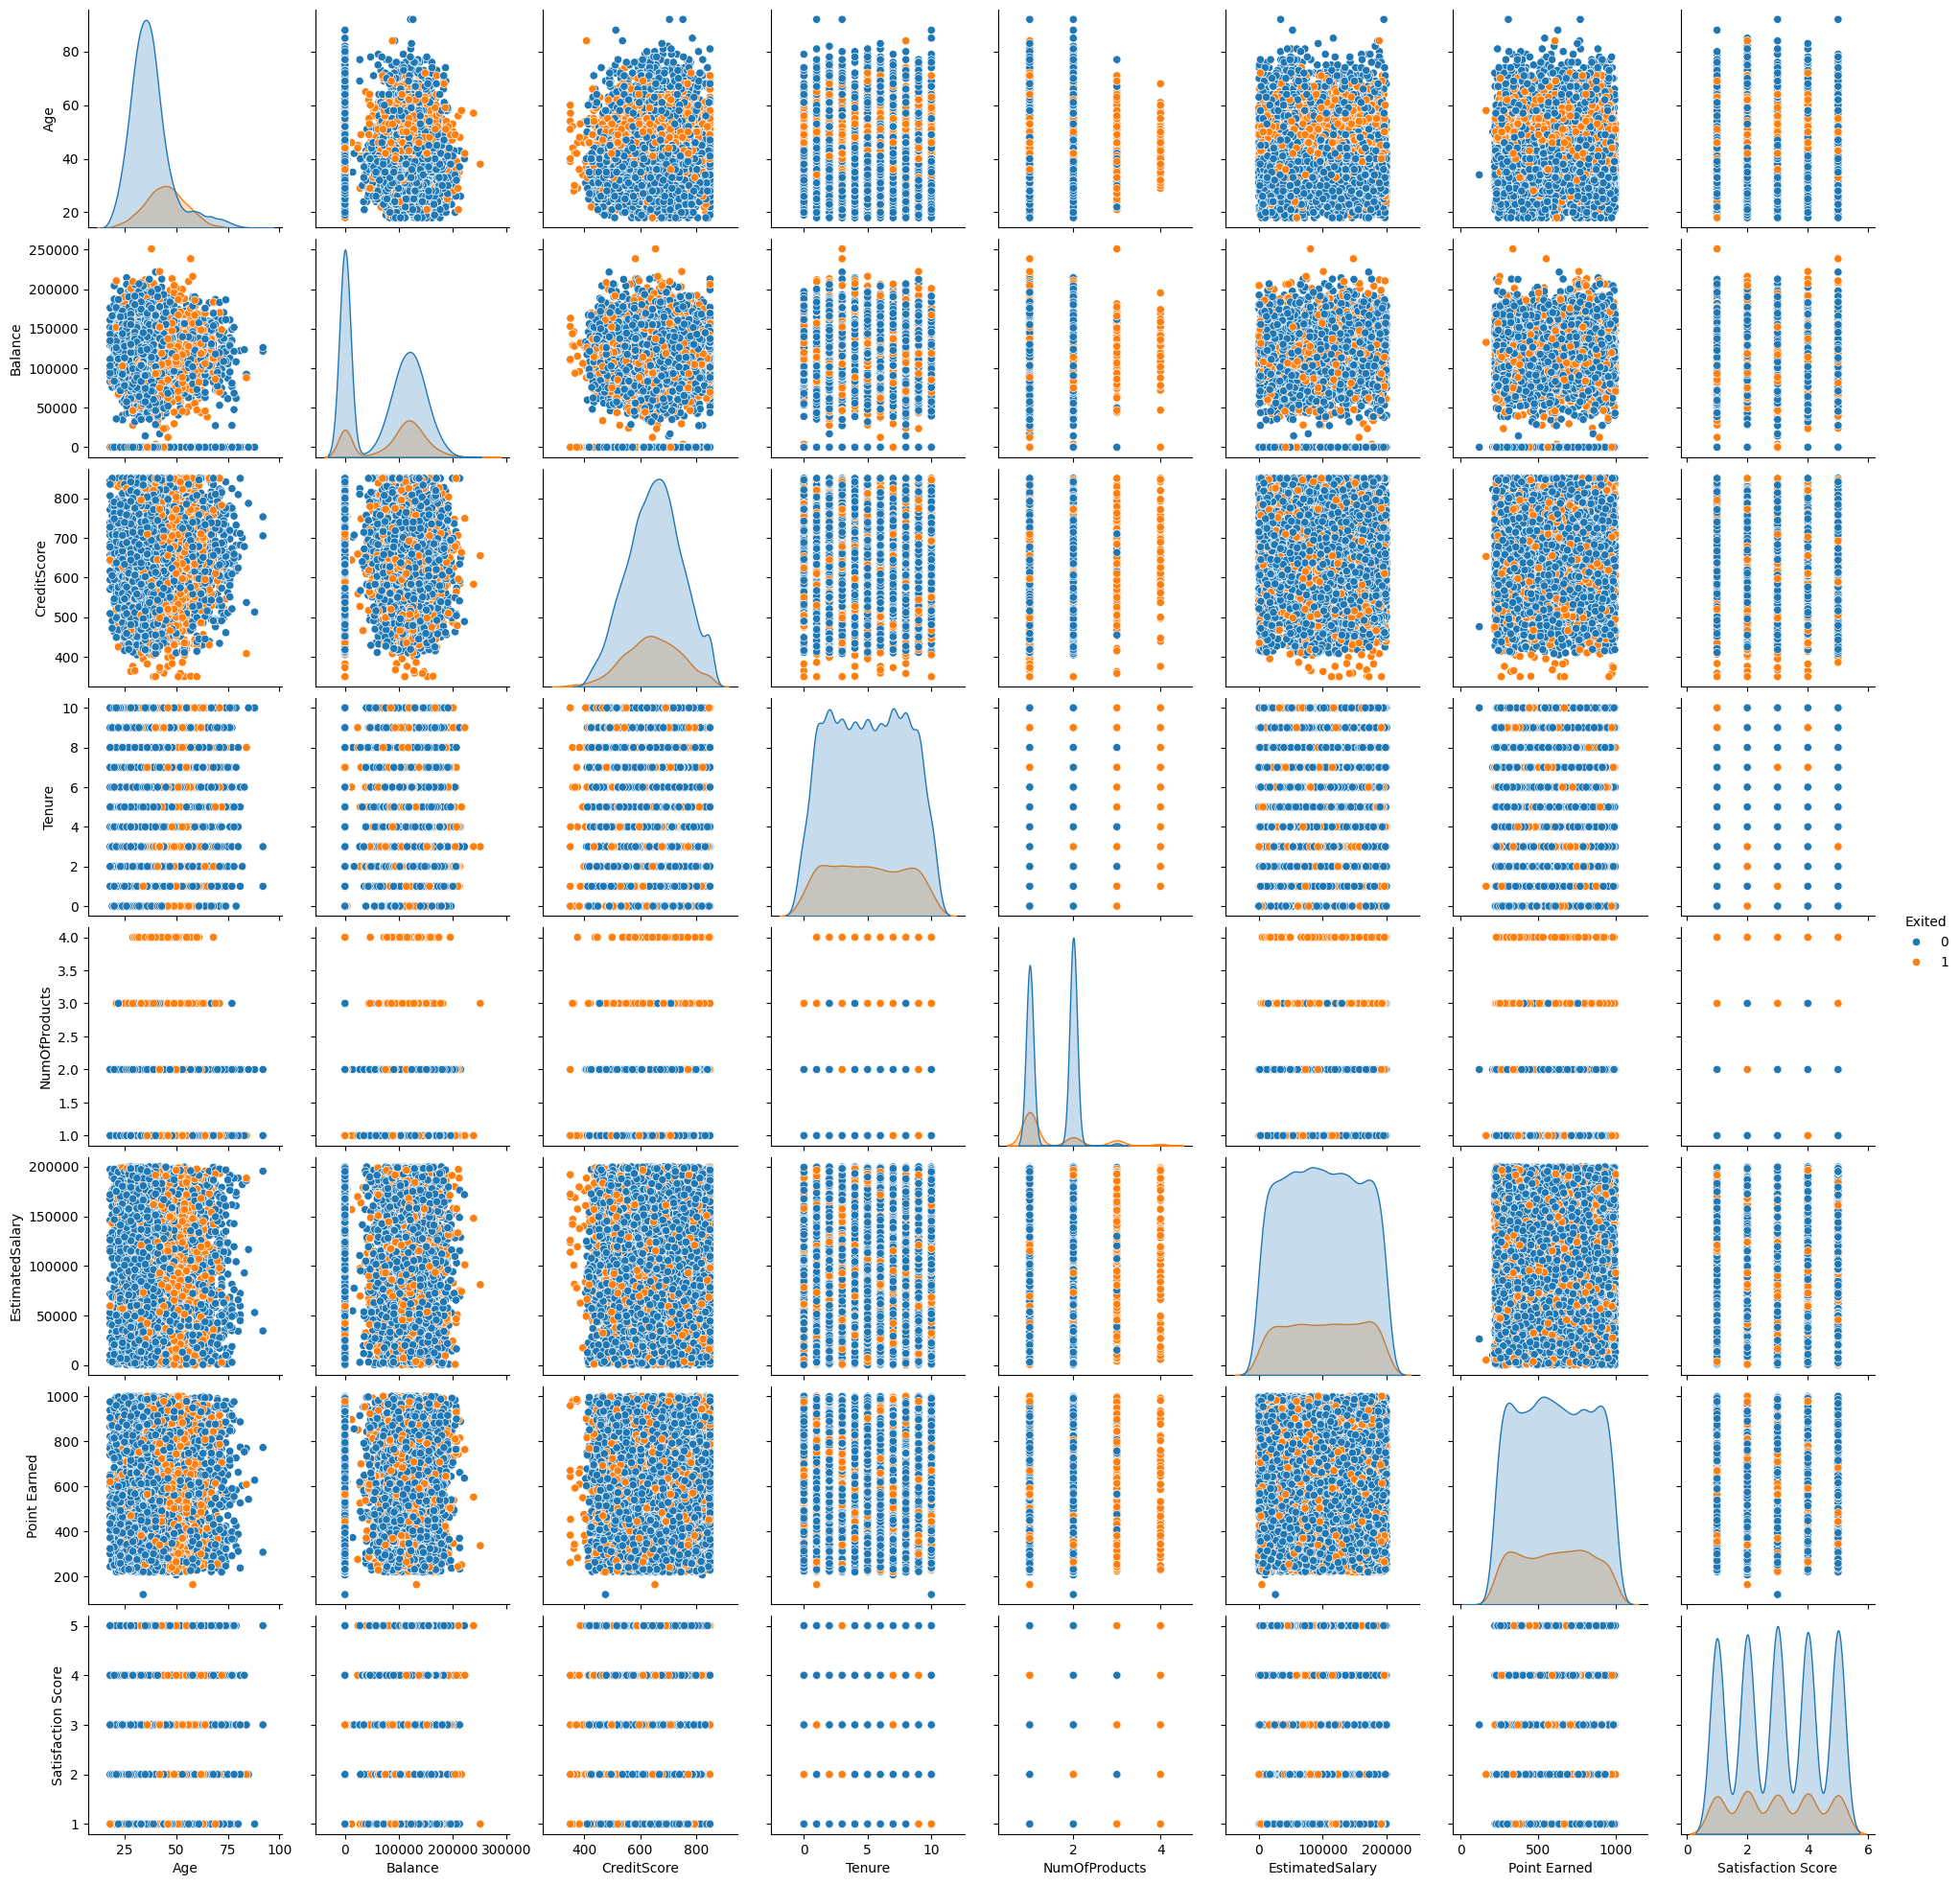

In [15]:
sns.pairplot(Customer_Churn[numerical_features + ['Exited']], hue='Exited')
plt.savefig('../plots/pairplot.png')
plt.show()

### Correlation Heatmap

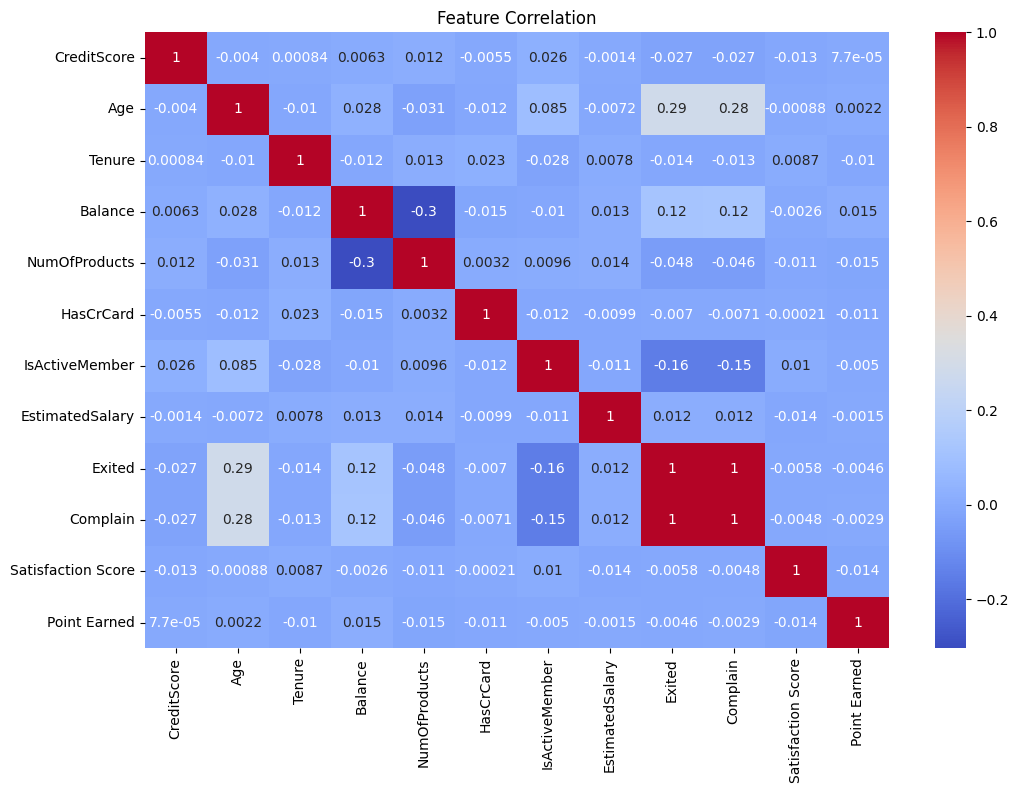

In [42]:
numeric_customer_churn = Customer_Churn.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12,8))
sns.heatmap(numeric_customer_churn.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.savefig('../plots/correlation_heatmap.png')
plt.show()

In [7]:
# Drop unnecessary columns
Customer_Churn = Customer_Churn.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [8]:
Customer_Churn.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456


In [9]:
Customer_Churn.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type',
       'Point Earned'],
      dtype='object')

In [10]:
# printing the unique values in object columns
for col in Customer_Churn.select_dtypes(include='object').columns:
    print(col, Customer_Churn[col].unique())

Geography ['France' 'Spain' 'Germany']
Gender ['Female' 'Male']
Card Type ['DIAMOND' 'GOLD' 'SILVER' 'PLATINUM']


In [11]:
# printing the unique values in numerical columns
numerical_cols = ['CreditScore', 'Age', 'EstimatedSalary', 'Balance', 'Point Earned']

for col in Customer_Churn.select_dtypes(include=['int64','float64']).columns:
    if col not in numerical_cols:
        print(col, Customer_Churn[col].unique())

Tenure [ 2  1  8  7  4  6  3 10  5  9  0]
NumOfProducts [1 3 2 4]
HasCrCard [1 0]
IsActiveMember [1 0]
Exited [1 0]
Complain [1 0]
Satisfaction Score [2 3 5 4 1]


In [12]:
Customer_Churn.isnull().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [13]:
# Check data types of each column
Customer_Churn.dtypes

CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [14]:
# Check target distribution
Customer_Churn['Exited'].value_counts()

Exited
0    7962
1    2038
Name: count, dtype: int64

In [15]:
# Check for duplicate rows
Customer_Churn.duplicated().sum()

np.int64(0)

**Insights:**

1. CustomerId, RowNumber, SurName were removed as they are not required for modelling
2. No missing values in the dataset
3. No Null Values in the dataset
4. Class imbalance identified in the target

**3. Exploratory Data Analysis (EDA)**

In [16]:
Customer_Churn.shape

(10000, 15)

In [17]:
Customer_Churn.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type',
       'Point Earned'],
      dtype='object')

In [18]:
Customer_Churn.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


**Numerical Features - Analysis**

Understand the distribution of the numerical features

In [19]:
def plot_histogram(Customer_Churn, column_name):

    plt.Figure(figsize=(5,3))
    sns.histplot(Customer_Churn[column_name], kde=True)
    plt.title(f"Distribution of {column_name}")

    #calculate mean and median values for the column
    col_mean = Customer_Churn[column_name].mean()
    col_median = Customer_Churn[column_name].median()

    #plot mean and median vertical lines on the histogram
    plt.axvline(col_mean, color='r', linestyle='--', label='Mean')
    plt.axvline(col_median, color ='g', linestyle='-', label='Median')

    plt.legend()
    plt.show()


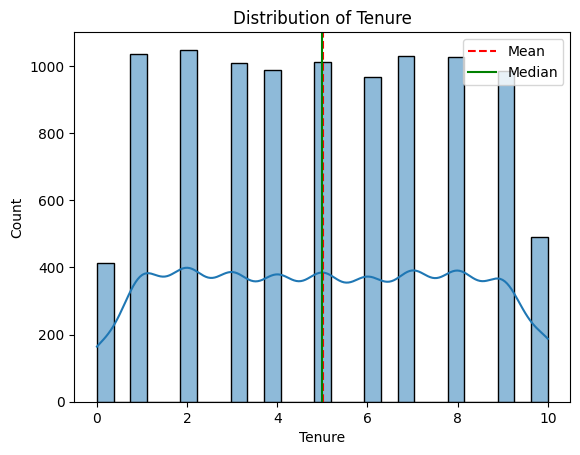

In [42]:
plot_histogram(Customer_Churn, "Tenure")

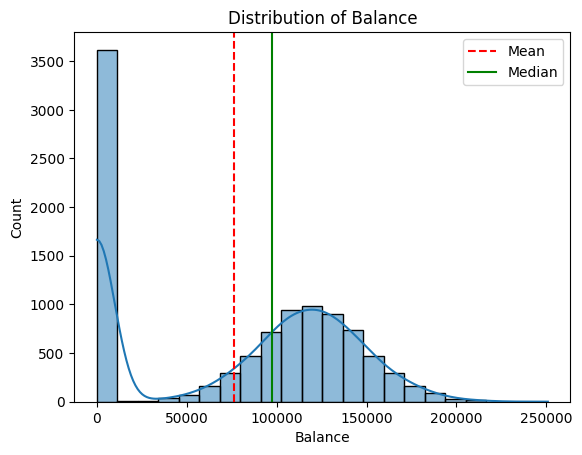

In [43]:
plot_histogram(Customer_Churn, "Balance")

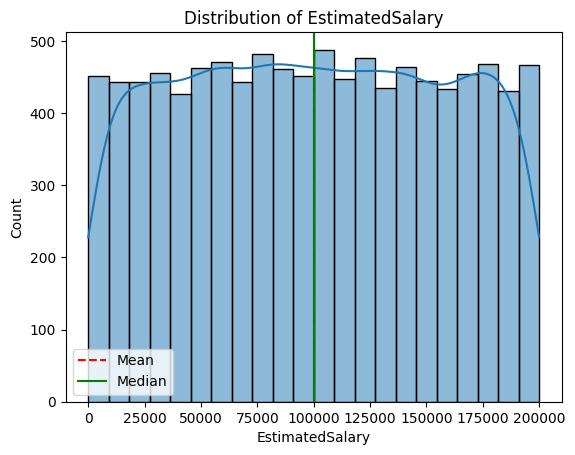

In [44]:
plot_histogram(Customer_Churn, "EstimatedSalary")

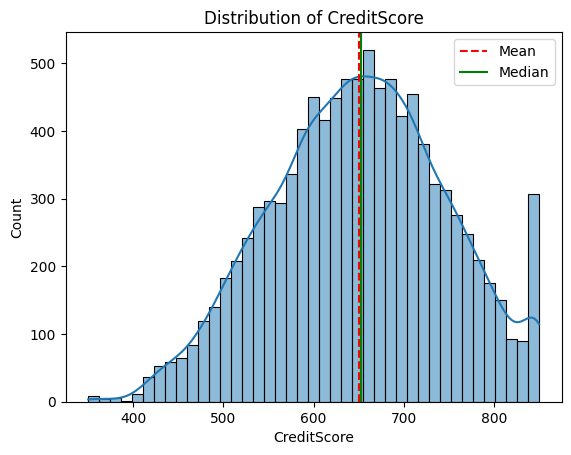

In [45]:
plot_histogram(Customer_Churn, "CreditScore")

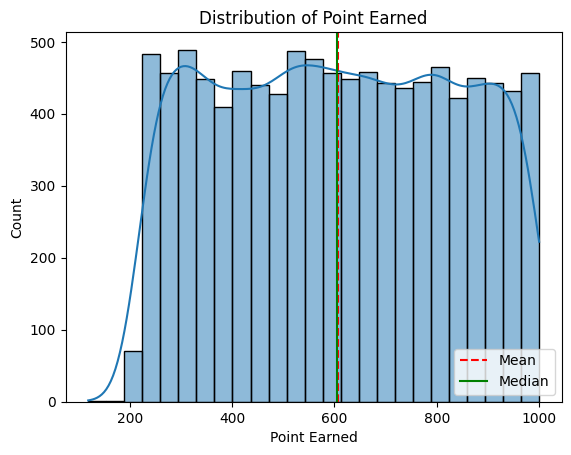

In [20]:
plot_histogram(Customer_Churn, "Point Earned")

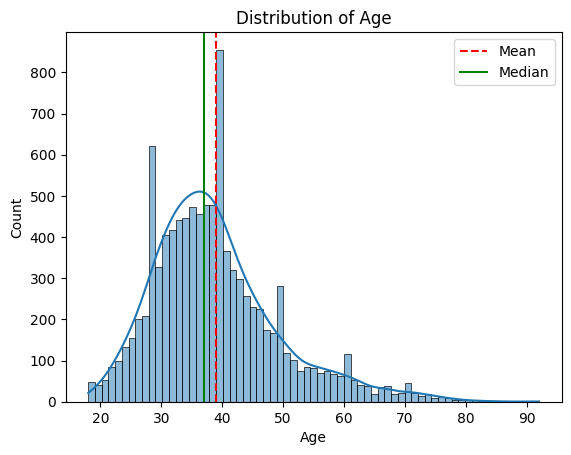

In [21]:
plot_histogram(Customer_Churn, "Age")

Box plot for Numerical Features

In [29]:
def box_plot(Customer_Churn, column_name):

    plt.Figure(figsize=(5,3))
    sns.boxplot(y=Customer_Churn[column_name])
    plt.title(f"Box plot of {column_name}")
    plt.ylabel(column_name)
    plt.show()

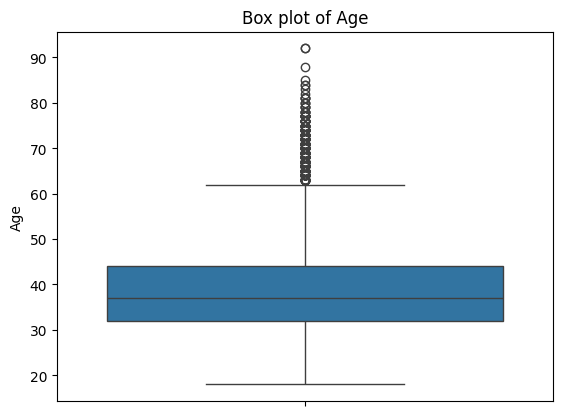

In [30]:
box_plot(Customer_Churn, "Age")

In [36]:
Q1 = Customer_Churn['Age'].quantile(0.25)
Q3 = Customer_Churn['Age'].quantile(0.75)
IQR = Q3 - Q1

outliers = Customer_Churn[(Customer_Churn['Age'] < Q1 - 1.5 * IQR) | (Customer_Churn['Age'] > Q3 + 1.5 * IQR)]
print("Number of outliers:", outliers.shape[0])

Number of outliers: 359


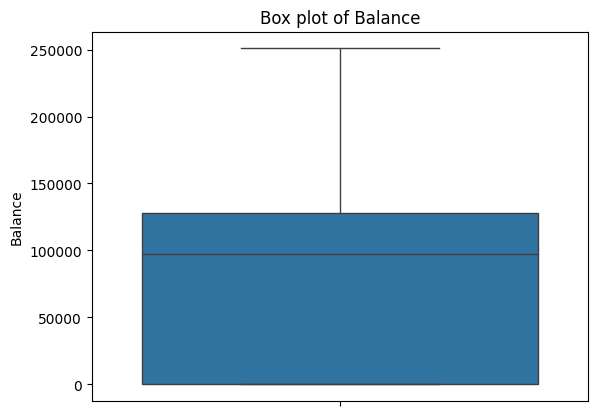

In [31]:
box_plot(Customer_Churn, "Balance")

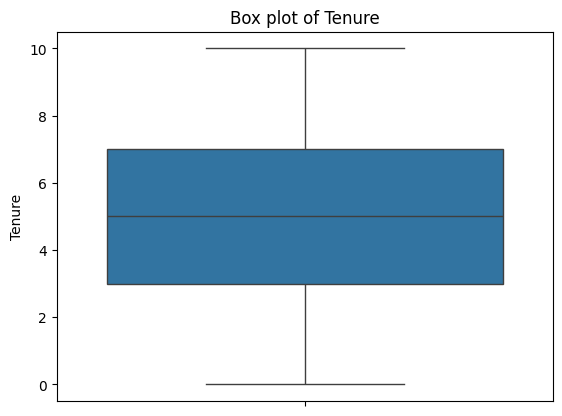

In [32]:
box_plot(Customer_Churn, "Tenure")

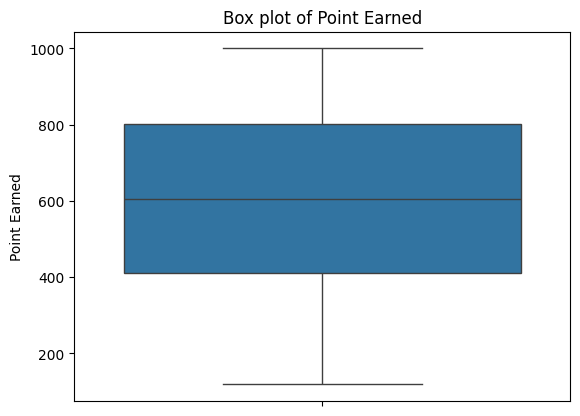

In [33]:
box_plot(Customer_Churn, "Point Earned")

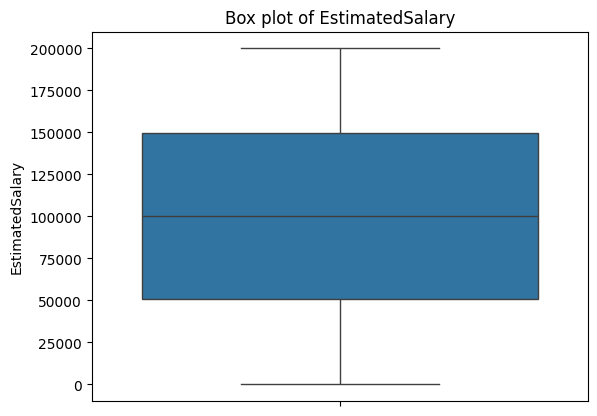

In [34]:
box_plot(Customer_Churn, "EstimatedSalary")

Coorelation Heatmap for numerical columns

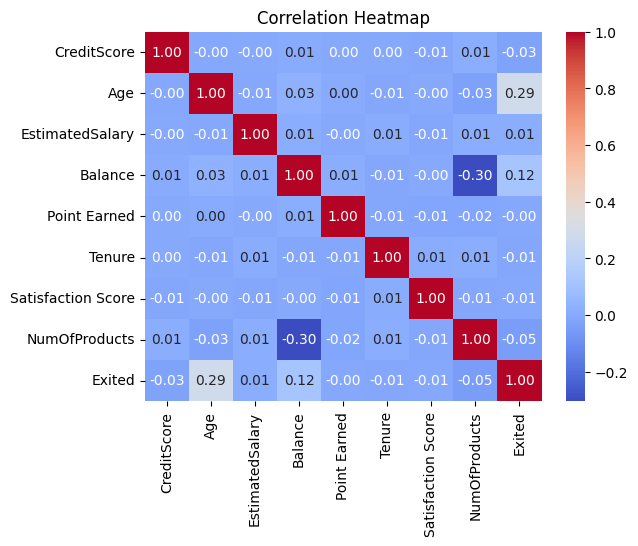

In [43]:
# Correlation Matrix - Heatmap
plt.Figure(figsize=(8,4))

sns.heatmap(Customer_Churn[['CreditScore', 'Age', 'EstimatedSalary', 'Balance', 'Point Earned', 'Tenure', 'Satisfaction Score', 'NumOfProducts', 'Exited']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

Categorical Features - Analysis

In [44]:
Customer_Churn.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type',
       'Point Earned'],
      dtype='object')

In [45]:
Customer_Churn.dtypes

CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

Countplot for Categorical Columns

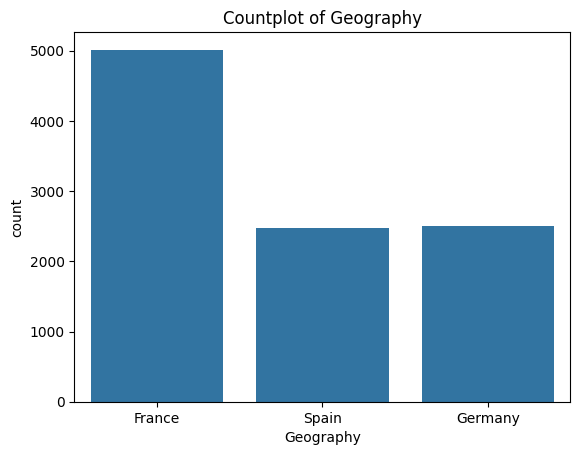

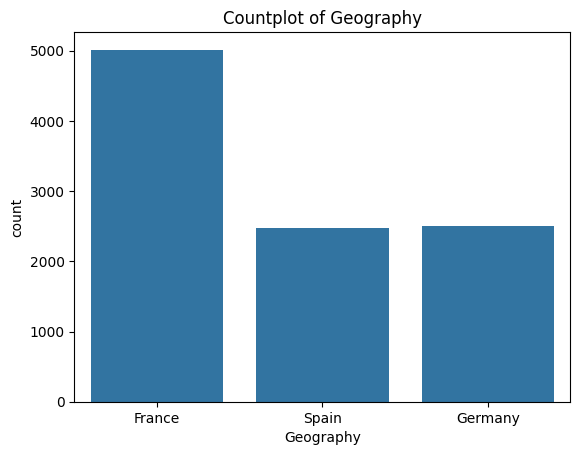

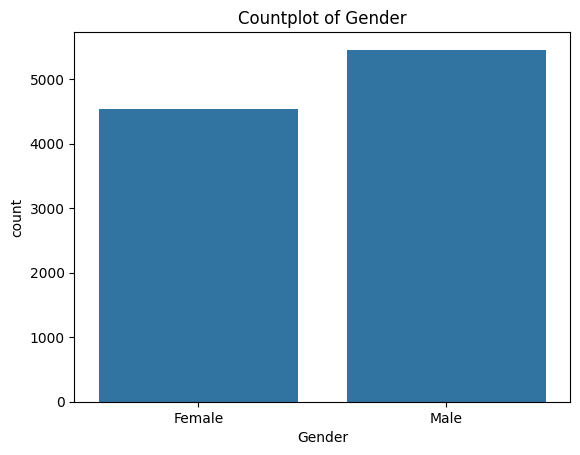

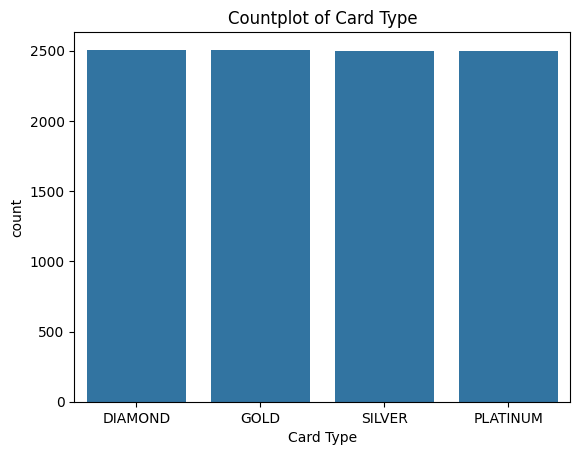

In [50]:
object_cols = Customer_Churn.select_dtypes(include='object').columns.to_list()
object_cols = ["Geography"] + object_cols

for col in object_cols:
    plt.Figure(figsize=(5,3))
    sns.countplot(x=Customer_Churn[col])
    plt.title(f"Countplot of {col}")
    plt.show()

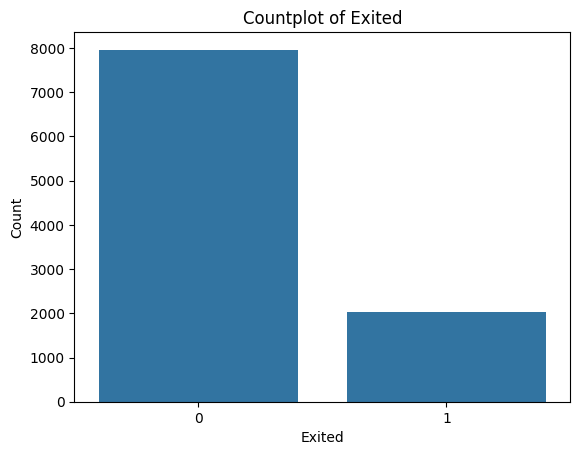

In [53]:
sns.countplot(x='Exited', data=Customer_Churn)
plt.title("Countplot of Exited")
plt.xlabel("Exited")
plt.ylabel("Count")
plt.show()

4. Data preprocessing

In [54]:
Customer_Churn.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456


Label encoding of Categorical features

In [55]:
# Identifying categorical columns
categorical_cols = Customer_Churn.select_dtypes(include='object').columns
categorical_cols

Index(['Geography', 'Gender', 'Card Type'], dtype='object')

In [90]:
# initialize a dictionary to save the encoders
encoders = {}

# Apply label encoding to object encoders
for col in object_cols:
    le = LabelEncoder()
    Customer_Churn[col] = le.fit_transform(Customer_Churn[col])
    encoders[col] = le

# Save encoders to a pickle file
with open("encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)


In [57]:
encoders

{'Geography': LabelEncoder(),
 'Gender': LabelEncoder(),
 'Card Type': LabelEncoder()}

In [58]:
Customer_Churn.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,1,2,0,464
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,1,3,0,456


Training and Test data split

In [63]:
# Splitting the data into features and target variable
x = Customer_Churn.drop('Exited', axis = 1)
y = Customer_Churn['Exited']

In [ ]:
print(x)

      CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619          0       0   42       2       0.00              1   
1             608          2       0   41       1   83807.86              1   
2             502          0       0   42       8  159660.80              3   
3             699          0       0   39       1       0.00              2   
4             850          2       0   43       2  125510.82              1   
...           ...        ...     ...  ...     ...        ...            ...   
9995          771          0       1   39       5       0.00              2   
9996          516          0       1   35      10   57369.61              1   
9997          709          0       0   36       7       0.00              1   
9998          772          1       1   42       3   75075.31              2   
9999          792          0       0   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  C

In [65]:
print(y)

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64


In [66]:
# Split train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [67]:
print(y_test.shape)

(2000,)


In [71]:
print(y_train.value_counts())

Exited
0    6355
1    1645
Name: count, dtype: int64


Synthetic Minority OverSampling Technique(SMOTE)

In [72]:
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)
print(y_train_smote.value_counts())

Exited
0    6355
1    6355
Name: count, dtype: int64


5. Model Training 

Training with default hyperparameters

In [83]:
# dictionary of models
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "KNeighbors": KNeighborsClassifier()
}

In [84]:
# dictionary to store the cross validation scores
cv_scores = {}

#perform 5-fold cross validation for each model

for model_name, model in models.items():
    scores = cross_val_score(model, x_train_smote, y_train_smote, cv=5, scoring='accuracy')
    cv_scores[model_name] = scores
    print(f"{model_name} CV Accuracy: {scores.mean():.4f}")


RandomForest CV Accuracy: 0.9984
DecisionTree CV Accuracy: 0.9976
XGBoost CV Accuracy: 0.9988
KNeighbors CV Accuracy: 0.6816


In [85]:
cv_scores

{'RandomForest': array([0.99881983, 0.99803304, 0.99842644, 0.99803304, 0.99881983]),
 'DecisionTree': array([0.99803304, 0.99685287, 0.99763965, 0.99685287, 0.99842644]),
 'XGBoost': array([0.99921322, 0.99803304, 0.99881983, 0.99881983, 0.99921322]),
 'KNeighbors': array([0.67466562, 0.66483084, 0.67466562, 0.69551534, 0.69826908])}

XGBClassifier gives the highest accuracy compared to other models with default parameters

In [86]:
xgb = XGBClassifier(random_state=42)
xgb.fit(x_train_smote, y_train_smote)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [87]:
print(y_test.value_counts())

Exited
0    1607
1     393
Name: count, dtype: int64


6. Model Evaluation

In [88]:
# evaluate the model on test data
y_test_pred = xgb.predict(x_test)

print("Accuracy Score:\n",accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n",classification_report(y_test, y_test_pred))

Accuracy Score:
 0.999
Confusion Matrix:
 [[1606    1]
 [   1  392]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [99]:
# save trained model as a pickle file
model_data = {'model': xgb, "features_name": x.columns.tolist()}

with open("Customer_churn_model.pkl", "wb") as f:
    pickle.dump(model_data, f)

7. Load the saved model and build a Predicive System

In [100]:
# load the saved model and the features name

with open("Customer_churn_model.pkl", "rb") as f:
    model_data = pickle.load(f)

    model = model_data['model']
    features_name = model_data['features_name']

In [101]:
print(model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)


In [102]:
print(features_name)

['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score', 'Card Type', 'Point Earned']
